In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(threshold=5)

import ast
import re

In [68]:
df = pd.read_csv('cleaned_data.csv', delimiter=';')

In [69]:
df_save = df.copy()

In [46]:
# enlever TotalGHGEmissions
Site_Energy_Use = df.drop(['TotalGHGEmissions'], axis=1)

In [47]:
df = df_save.copy()

In [70]:
Total_GHG_Emissions = df.drop(['SiteEnergyUse(kBtu)'], axis=1)

In [71]:
Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions.drop(['ENERGYSTARScore'], axis=1)

In [8]:
#Site_Energy_Use = Site_Energy_Use.drop('Unnamed: 0', axis=1)
#Total_GHG_Emissions = Total_GHG_Emissions.drop('Unnamed: 0', axis=1)
#Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop('Unnamed: 0', axis=1)


In [6]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


## Site_Energy_Use

### Sans passage au log de la variable à expliquer

In [8]:
from pycaret.regression import *
exp_name = setup(data = Site_Energy_Use,  target = 'SiteEnergyUse(kBtu)', train_size = 0.8)

,Description,Value
0,session_id,3213
1,Target,SiteEnergyUse(kBtu)
2,Original Data,"(1696, 18)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1356, 55)"


In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,772649.8924,2603085550756.3662,1549615.8024,0.8881,0.3020,0.2203,1.5640
lightgbm,Light Gradient Boosting Machine,975656.0566,2875128174579.2676,1668441.9869,0.8711,0.3750,0.2950,0.7590
rf,Random Forest Regressor,966390.3974,3041361942922.1650,1708533.7234,0.8666,0.3478,0.2820,2.3550
gbr,Gradient Boosting Regressor,1072917.6181,3079562200715.9297,1721315.4075,0.8651,0.3854,0.3269,0.5970
dt,Decision Tree Regressor,1118555.4111,4651751538199.7803,2138658.8379,0.7912,0.4288,0.3021,0.0790
ridge,Ridge Regression,1452163.2125,5092274077696.0000,2224951.2750,0.7757,0.6926,0.5167,0.0400
llar,Lasso Least Angle Regression,1454983.6572,5098294993323.0830,2225620.8566,0.7755,0.6818,0.5187,1.3100
lasso,Lasso Regression,1455086.5125,5098591617024.0000,2225692.2875,0.7754,0.6819,0.5188,0.1140
lr,Linear Regression,1462274.0625,5126540833587.2002,2232576.1250,0.7743,0.7015,0.5239,2.6000
omp,Orthogonal Matching Pursuit,1601999.3543,6509779418726.9111,2527610.5800,0.7131,0.6393,0.5472,0.0340


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=3213, verbose=0, warm_start=False)

In [10]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,797126.0604,2383826496306.9712,1543964.5386,0.9181,0.2722,0.2010
1,672318.8674,1803725493307.5696,1343028.4782,0.9467,0.2566,0.1917
2,786475.1939,1964329515794.7681,1401545.4027,0.9299,0.2900,0.2176
3,850780.9537,2069912771865.8184,1438719.1428,0.9066,0.2806,0.2303
4,659792.1194,1484870725641.6902,1218552.7176,0.9286,0.2806,0.2235
5,565385.4179,1065997316136.3994,1032471.4602,0.9334,0.3320,0.2161
6,773338.3482,2045276912808.2395,1430131.7816,0.8556,0.2963,0.2210
7,905573.6520,3632413829941.4346,1905889.2491,0.8348,0.3477,0.2309
8,667289.0066,2085677331848.7749,1444187.4296,0.8809,0.2583,0.1905
9,1048419.3049,7494825113911.9980,2737667.8239,0.7460,0.4062,0.2802


In [11]:
# automatique searching hyperparameters
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1129903.8895,3490021836306.4106,1868160.0136,0.8801,0.3567,0.3199
1,1102177.2768,3269966249239.3403,1808304.7999,0.9033,0.3946,0.3678
2,1150233.2862,2890624995701.2261,1700183.8123,0.8968,0.3975,0.3665
3,1220698.4766,3047709270892.6343,1745768.9626,0.8625,0.3905,0.3661
4,1012140.0063,2240493328194.9678,1496827.7550,0.8923,0.4093,0.3915
5,900222.3074,1872528440379.3535,1368403.6102,0.8831,0.4100,0.3436
6,1097279.1648,2580515426958.3613,1606398.2778,0.8179,0.4245,0.3947
7,1236768.7336,4783339202117.9941,2187084.6353,0.7825,0.4208,0.3523
8,1121257.4174,3355887449884.2158,1831908.1445,0.8084,0.3813,0.3480
9,1460638.7377,8679899625732.2832,2946166.9379,0.7058,0.5137,0.4700


In [12]:
tuned_et = tune_model(et, custom_grid = {'alpha': np.linspace(0,2,40)},search_algorithm = 'grid')

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:00:53
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


ValueError: Invalid parameter actual_estimator for estimator ExtraTreesRegressor(n_jobs=-1, random_state=1886). Check the list of available parameters with `estimator.get_params().keys()`.

In [12]:
#tuned_knn with default n_iter (10)
plot_model(tuned_et, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,10
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.4
min_impurity_split,None
min_samples_leaf,3


In [ ]:
#sortir les hyperparamètres de grid search
#randomizesearchCV est aleatoire
#gridsearchCV prend les paramètres de randomize mieux optimisés

In [13]:
# generate predictions on unseen data
y_pred = predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1219640.9352,5671682951227.7256,2381529.5403,0.7794,0.4650,0.3959


# Analyse des résidus

In [14]:
y_pred['Residuals'] = y_pred['SiteEnergyUse(kBtu)'] - y_pred['Label']

In [15]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of residuals
y_pred['scaled_residuals'] = scale.fit_transform(y_pred['Residuals'].values.reshape(-1,1))
y_pred['scaled_Label'] = scale.fit_transform(y_pred['Label'].values.reshape(-1,1)) 

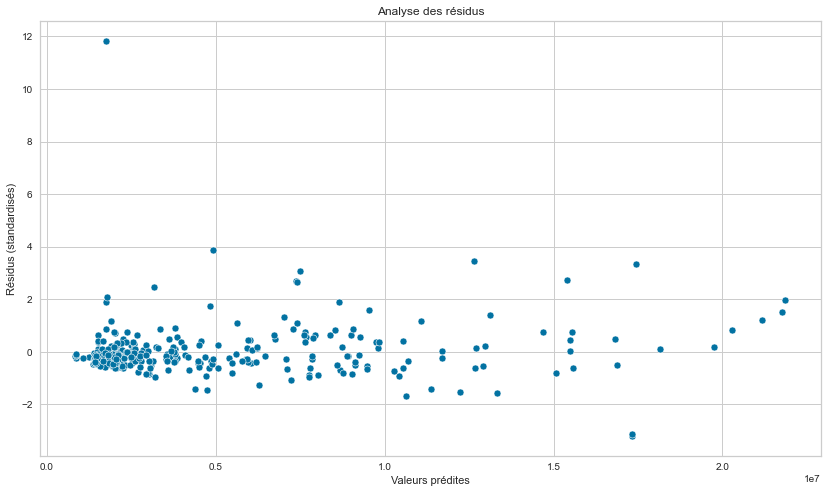

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.scatterplot(data=y_pred, x="Label", y="scaled_residuals")
plt.title("Analyse des résidus") #title
plt.xlabel("Valeurs prédites") #x label
plt.ylabel("Résidus (standardisés)") #y label
plt.show()


#### Feature Importance

In [17]:
# interpreting model
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:

feature_importance =['GFAPerBuilding',
                     'LargestPropertyUseTypeGFA',
                     'PrimaryPropertyType_Large Office',
                     'ENERGYSTARScore',
                     'PrimaryPropertyType_Supermarket/Grocery Store',
                     'PrimaryPropertyType_Supermarket/ Grocery Store', 
                     'NumberofFloors',
                     'Neighborhood_DOWNTOWN',
                     'PrimaryPropertyType_Medical Office',
                     'GFAParkingRate',   
                      'SiteEnergyUse(kBtu)']  
                     
                     


for i in Site_Energy_Use.columns:
    if i not in feature_importance:
        Site_Energy_Use = Site_Energy_Use.drop(i, axis = 1)

In [19]:
exp_name = setup(data = Site_Energy_Use,  target = 'SiteEnergyUse(kBtu)', train_size = 0.8)

,Description,Value
0,session_id,8049
1,Target,SiteEnergyUse(kBtu)
2,Original Data,"(1696, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1356, 5)"


In [20]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,997876.2590,3655326805716.9922,1911890.8980,0.8356,0.4631,0.3827
1,1129738.3374,2976611965845.3325,1725286.0533,0.8293,0.4793,0.4380
2,938949.2830,3069722632989.6665,1752062.3941,0.8974,0.4363,0.3289
3,1326641.5109,4625117891332.7520,2150608.7258,0.8421,0.5346,0.5050
4,1041815.2476,3413349138665.7070,1847525.1388,0.8918,0.4088,0.3463
5,1018996.0631,2984240419584.3408,1727495.4181,0.8657,0.4404,0.3891
6,1089424.1394,5447827672385.0898,2334058.1982,0.8189,0.4246,0.2938
7,946680.5825,2611831694977.1416,1616116.2381,0.8424,0.3902,0.3045
8,1119100.2642,9173572778772.7676,3028790.6462,0.6726,0.4499,0.2808
9,995675.7837,3356762040317.6963,1832146.8392,0.8714,0.3731,0.2782


In [21]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1469098.6602,7105600321754.8633,2665633.1934,0.6805,0.5653,0.4943
1,1496547.4715,6252534843473.9355,2500506.9173,0.6415,0.5266,0.4403
2,1421135.7658,5565458980953.1816,2359122.5023,0.8140,0.4985,0.4380
3,1909587.7015,8904351680000.1094,2984016.0321,0.6960,0.5789,0.5026
4,1465185.0364,8381902083570.6797,2895151.4785,0.7344,0.4851,0.3727
5,1409307.3454,6002158987464.1211,2449930.4046,0.7299,0.4762,0.4034
6,1710356.1939,9765778287767.7148,3125024.5259,0.6753,0.5505,0.3677
7,1415556.3957,5463882344934.3887,2337494.8866,0.6704,0.4950,0.3932
8,1840981.9745,13902153342625.1074,3728559.1510,0.5038,0.6287,0.5016
9,1362458.5452,6174013058926.3760,2484756.1367,0.7635,0.4764,0.3234


In [22]:
# generate predictions on unseen data
y_pred = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,840818.6957,2289859206557.5332,1513228.0749,0.8710,0.3981,0.3058


### Avec passage au log de la variable à expliquer

In [23]:
df = pd.read_csv('cleaned_data.csv', delimiter=';')
#Site_Energy_Use = Site_Energy_Use.drop('Unnamed: 0', axis=1)

In [24]:
df_save = df.copy()

In [25]:
# enlever TotalGHGEmissions
Site_Energy_Use = df.drop(['TotalGHGEmissions'], axis=1)

In [26]:
for i in Site_Energy_Use.columns:
    print(i)

PrimaryPropertyType
CouncilDistrictCode
Neighborhood
NumberofBuildings
NumberofFloors
PropertyGFATotal
LargestPropertyUseTypeGFA
ENERGYSTARScore
SiteEnergyUse(kBtu)
BuildingAge
TotalUseTypeNumber
GFABuildingRate
GFAParkingRate
GFAPerBuilding
GFAPerFloor
ElectricitySource
GasSource
SteamSource


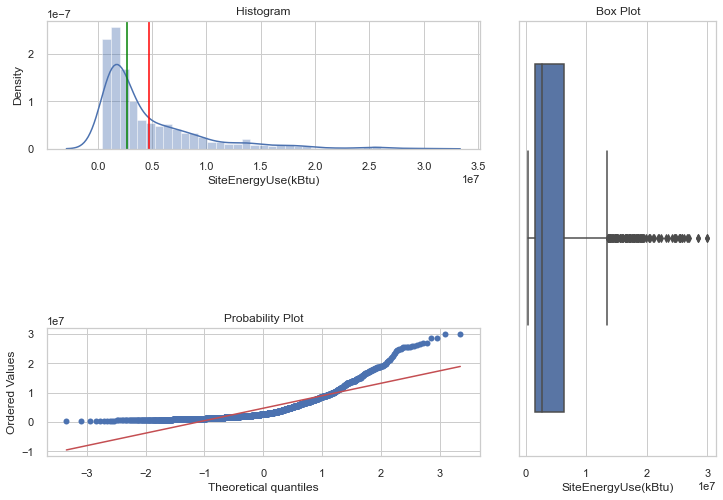

In [27]:
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[2, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)
 
    ax3 = fig.add_subplot(grid[:, 2]) 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(Site_Energy_Use, 'SiteEnergyUse(kBtu)')

In [28]:
from scipy.stats import skew
print("Skewness of the SiteEnergyUse(kBtu) is", Site_Energy_Use['SiteEnergyUse(kBtu)'].skew())

Skewness of the SiteEnergyUse(kBtu) is 2.1100300655712854


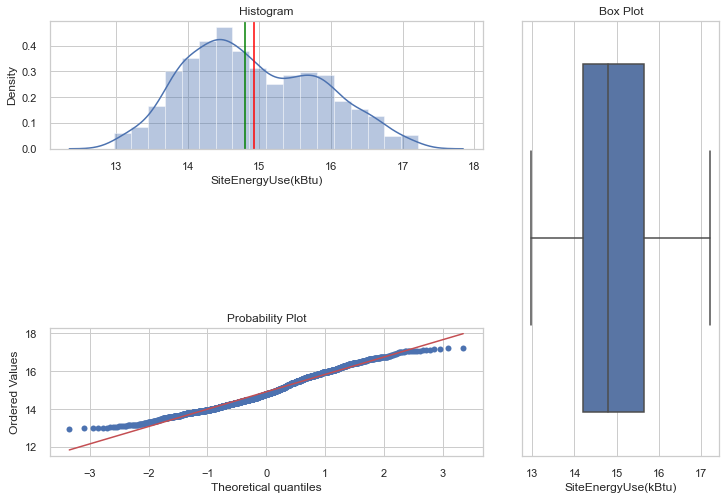

In [29]:
Site_Energy_Use["SiteEnergyUse(kBtu)"] = np.log1p(Site_Energy_Use["SiteEnergyUse(kBtu)"])
three_chart_plot(Site_Energy_Use, 'SiteEnergyUse(kBtu)')

In [30]:
print("Skewness of the SiteEnergyUse(kBtu) is", Site_Energy_Use['SiteEnergyUse(kBtu)'].skew())

Skewness of the SiteEnergyUse(kBtu) is 0.2817765168279764


In [31]:
from pycaret.regression import *
exp_name = setup(data = Site_Energy_Use,  target = 'SiteEnergyUse(kBtu)', train_size = 0.8)

,Description,Value
0,session_id,6929
1,Target,SiteEnergyUse(kBtu)
2,Original Data,"(1696, 18)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1356, 54)"


In [32]:
exp_name

(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='SiteEnergyUse(kBtu)',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                 ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='SiteEnergyUse(kBtu)')),
      

In [33]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2089,0.0901,0.2967,0.8915,0.0188,0.0141,1.3530
et,Extra Trees Regressor,0.1828,0.0925,0.3011,0.8883,0.0190,0.0123,1.2710
rf,Random Forest Regressor,0.2210,0.1013,0.3161,0.8780,0.0200,0.0149,1.2920
gbr,Gradient Boosting Regressor,0.2473,0.1153,0.3372,0.8607,0.0213,0.0167,0.3810
dt,Decision Tree Regressor,0.2677,0.1878,0.4303,0.7757,0.0273,0.0181,0.0520
ridge,Ridge Regression,0.3465,0.2105,0.4567,0.7504,0.0285,0.0232,0.0730
br,Bayesian Ridge,0.3472,0.2105,0.4567,0.7503,0.0285,0.0233,0.0470
lr,Linear Regression,0.3523,0.2160,0.4630,0.7429,0.0289,0.0236,2.4660
ada,AdaBoost Regressor,0.3776,0.2312,0.4804,0.7226,0.0303,0.0254,0.3300
omp,Orthogonal Matching Pursuit,0.4478,0.3279,0.5703,0.6104,0.0355,0.0300,0.0280


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=6929, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [34]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1715,0.0540,0.2324,0.9367,0.0149,0.0117
1,0.2038,0.0839,0.2897,0.8950,0.0183,0.0137
2,0.2339,0.1679,0.4098,0.8086,0.0253,0.0155
3,0.2032,0.0817,0.2858,0.8913,0.0179,0.0136
4,0.1952,0.0723,0.2689,0.9204,0.0169,0.0130
5,0.2136,0.0879,0.2964,0.8999,0.0191,0.0146
6,0.2095,0.0730,0.2703,0.9301,0.0170,0.0140
7,0.2443,0.1180,0.3435,0.8576,0.0219,0.0165
8,0.2134,0.0794,0.2818,0.8947,0.0179,0.0145
9,0.2005,0.0833,0.2886,0.8809,0.0186,0.0137


In [36]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1567,0.0652,0.2553,0.9236,0.0163,0.0106
1,0.1600,0.0720,0.2682,0.9100,0.0170,0.0108
2,0.2060,0.1713,0.4139,0.8048,0.0255,0.0136
3,0.1870,0.0950,0.3082,0.8736,0.0192,0.0125
4,0.1698,0.0854,0.2923,0.9059,0.0181,0.0112
5,0.1887,0.0865,0.2942,0.9014,0.0190,0.0129
6,0.1705,0.0656,0.2562,0.9372,0.0161,0.0114
7,0.2087,0.1054,0.3246,0.8729,0.0207,0.0142
8,0.2048,0.0930,0.3049,0.8767,0.0193,0.0138
9,0.1757,0.0860,0.2933,0.8770,0.0189,0.0121


In [35]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2820,0.1434,0.3786,0.8319,0.0239,0.0189
1,0.2927,0.1645,0.4056,0.7943,0.0254,0.0195
2,0.3076,0.2330,0.4827,0.7345,0.0299,0.0205
3,0.3263,0.1772,0.4209,0.7642,0.0264,0.0219
4,0.3091,0.1575,0.3968,0.8266,0.0246,0.0205
5,0.2964,0.1430,0.3781,0.8372,0.0238,0.0200
6,0.3036,0.1624,0.4030,0.8446,0.0251,0.0202
7,0.3486,0.2018,0.4492,0.7566,0.0284,0.0235
8,0.3361,0.1926,0.4388,0.7446,0.0277,0.0227
9,0.2929,0.1515,0.3893,0.7833,0.0248,0.0199


In [37]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2979,0.1513,0.3890,0.8226,0.0247,0.0202
1,0.2820,0.1578,0.3972,0.8026,0.0250,0.0189
2,0.3698,0.2976,0.5455,0.6608,0.0339,0.0246
3,0.3292,0.1761,0.4197,0.7655,0.0265,0.0221
4,0.3157,0.1821,0.4267,0.7995,0.0266,0.0210
5,0.3287,0.1697,0.4120,0.8067,0.0265,0.0225
6,0.3395,0.1882,0.4339,0.8199,0.0273,0.0228
7,0.3438,0.2061,0.4540,0.7514,0.0290,0.0234
8,0.3429,0.1926,0.4389,0.7445,0.0280,0.0234
9,0.3142,0.1644,0.4055,0.7649,0.0260,0.0215


In [38]:
y_pred = predict_model(tuned_et)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3441,0.2168,0.4656,0.7564,0.0296,0.0233


#### Analyse des résidus

In [39]:
y_pred['Residuals'] = y_pred['SiteEnergyUse(kBtu)'] - y_pred['Label']

In [40]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of residuals
y_pred['scaled_residuals'] = scale.fit_transform(y_pred['Residuals'].values.reshape(-1,1))
y_pred['scaled_Label'] = scale.fit_transform(y_pred['Label'].values.reshape(-1,1)) 

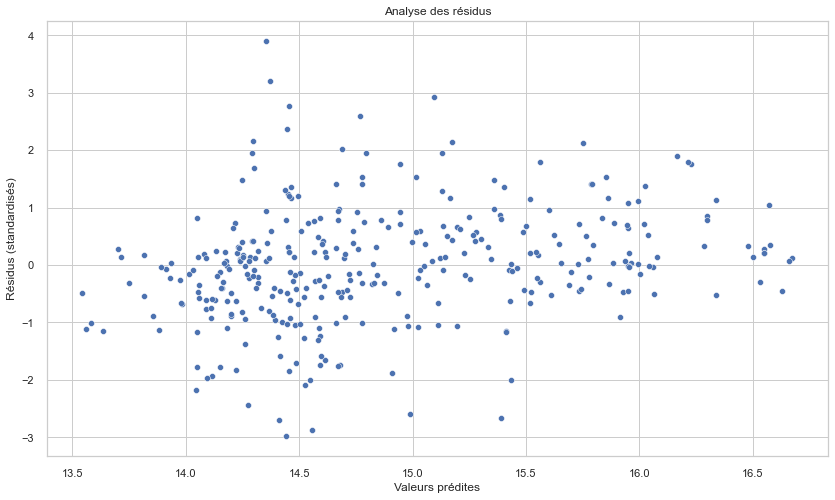

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.scatterplot(data=y_pred, x="Label", y="scaled_residuals")
plt.title("Analyse des résidus") #title
plt.xlabel("Valeurs prédites") #x label
plt.ylabel("Résidus (standardisés)") #y label
plt.show()

#### Feature Importance

In [42]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [43]:
pd.set_option('display.max_columns', None)
Site_Energy_Use.head(1)

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,ElectricitySource,GasSource,SteamSource
0,Hotel,7,DOWNTOWN,1.0,12.0,88434,88434.0,65.0,15.758764,88,1,1.0,0.0,88434.0,7369.5,1,0,0


In [119]:
feature_importance = []


for i in Site_Energy_Use.columns:
    if i not in feature_importance:
        Site_Energy_Use = Site_Energy_Use.drop(i, axis = 1)

In [120]:
exp_name = setup(data = Site_Energy_Use,  target = 'SiteEnergyUse(kBtu)', train_size = 0.8)

,Description,Value
0,session_id,8526
1,Target,SiteEnergyUse(kBtu)
2,Original Data,"(1696, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1356, 3)"


In [121]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3177,0.2732,0.5227,0.6410,0.0328,0.0216
1,0.3053,0.1988,0.4459,0.7326,0.0281,0.0206
2,0.3422,0.2638,0.5136,0.6990,0.0321,0.0230
3,0.2472,0.1723,0.4151,0.7962,0.0261,0.0164
4,0.3309,0.2605,0.5104,0.6678,0.0326,0.0227
5,0.2708,0.1865,0.4319,0.7876,0.0272,0.0181
6,0.2939,0.2089,0.4571,0.7379,0.0287,0.0197
7,0.2897,0.1967,0.4435,0.7634,0.0279,0.0194
8,0.2882,0.1641,0.4050,0.8522,0.0260,0.0198
9,0.2727,0.1890,0.4348,0.7714,0.0277,0.0186


In [122]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4110,0.3712,0.6093,0.5123,0.0383,0.0280
1,0.4002,0.3029,0.5503,0.5927,0.0347,0.0270
2,0.3917,0.2853,0.5342,0.6745,0.0333,0.0262
3,0.3568,0.2725,0.5220,0.6778,0.0326,0.0236
4,0.3719,0.2523,0.5023,0.6782,0.0320,0.0253
5,0.3728,0.3043,0.5516,0.6535,0.0345,0.0248
6,0.3841,0.2912,0.5396,0.6346,0.0338,0.0257
7,0.4021,0.3076,0.5547,0.6299,0.0348,0.0269
8,0.4253,0.3010,0.5487,0.7289,0.0349,0.0289
9,0.3694,0.2875,0.5362,0.6522,0.0337,0.0247


In [50]:
# generate predictions on unseen data
y_pred = predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3848,0.2758,0.5252,0.6509,0.0333,0.0261


## TotalGHGEmissions (avec ENERGYSTARScore)

### Sans passage au log de la variable à expliquer

In [65]:
#Total_GHG_Emissions = pd.read_csv('Dataset_TotalGHGEmissions.csv')
#Total_GHG_Emissions = Total_GHG_Emissions.drop('Unnamed: 0', axis=1)

In [49]:
from pycaret.regression import *
exp_name = setup(data = Total_GHG_Emissions,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,7001
1,Target,TotalGHGEmissions
2,Original Data,"(1696, 18)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1356, 56)"


In [50]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,24.5326,2022.7775,44.4455,0.7023,0.5107,0.4835,1.2920
lightgbm,Light Gradient Boosting Machine,29.6706,2078.5310,44.9036,0.6998,0.6174,0.6119,1.0020
rf,Random Forest Regressor,28.6659,2140.1862,45.7918,0.6883,0.5607,0.6100,1.4540
gbr,Gradient Boosting Regressor,34.3414,2482.2145,49.3509,0.6410,0.6533,0.7686,0.3800
br,Bayesian Ridge,41.1179,3385.7221,57.8073,0.5055,0.7709,0.9251,0.0460
ridge,Ridge Regression,41.0995,3387.2461,57.8312,0.5046,0.7700,0.9211,0.1170
lr,Linear Regression,41.8110,3519.7405,58.9318,0.4857,0.7824,0.9468,3.4170
lasso,Lasso Regression,42.8855,3662.2888,60.0919,0.4682,0.7657,0.9956,0.0670
dt,Decision Tree Regressor,32.1724,3784.4631,60.7997,0.4379,0.6778,0.5995,0.0590
omp,Orthogonal Matching Pursuit,44.5219,4117.3395,63.9183,0.3943,0.7780,1.0225,0.0240


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7001, verbose=0, warm_start=False)

In [51]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19.7365,1123.1756,33.5138,0.7649,0.4768,0.4574
1,19.6596,1381.2396,37.1650,0.7792,0.5084,0.4574
2,23.5953,2034.1556,45.1016,0.7269,0.4891,0.3937
3,23.8026,2213.8692,47.0518,0.6388,0.4492,0.3624
4,25.8081,1892.4811,43.5027,0.7938,0.4868,0.4626
5,26.3389,2702.2481,51.9832,0.6735,0.5135,0.4491
6,30.2723,3398.0343,58.2927,0.4716,0.6122,0.6754
7,23.0418,1612.6064,40.1573,0.7352,0.5698,0.6449
8,28.9523,2247.6235,47.4091,0.6908,0.5027,0.4846
9,24.1182,1622.3415,40.2783,0.7485,0.4982,0.4476


In [52]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,26.9914,1582.9374,39.7861,0.6686,0.6005,0.6999
1,32.3086,2217.4588,47.0899,0.6456,0.7039,0.9380
2,35.8668,2938.9094,54.2117,0.6054,0.6707,0.7830
3,34.0097,2859.9767,53.4788,0.5334,0.6424,0.7070
4,36.4343,2950.4190,54.3178,0.6785,0.5957,0.6903
5,38.8177,3584.8358,59.8735,0.5669,0.6359,0.7154
6,37.3786,3195.6091,56.5297,0.5031,0.6806,0.8681
7,32.6036,1974.5211,44.4356,0.6758,0.6510,0.8196
8,36.3293,2857.2189,53.4530,0.6070,0.6216,0.7323
9,35.2526,2329.2701,48.2625,0.6389,0.6344,0.7552


In [53]:
# generate predictions on unseen data
y_pred = predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,32.4667,2604.9885,51.0391,0.6154,0.6654,0.8136


#### Analyse des résidus

In [54]:
y_pred['Residuals'] = y_pred['TotalGHGEmissions'] - y_pred['Label']


from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of residuals
y_pred['scaled_residuals'] = scale.fit_transform(y_pred['Residuals'].values.reshape(-1,1)) 

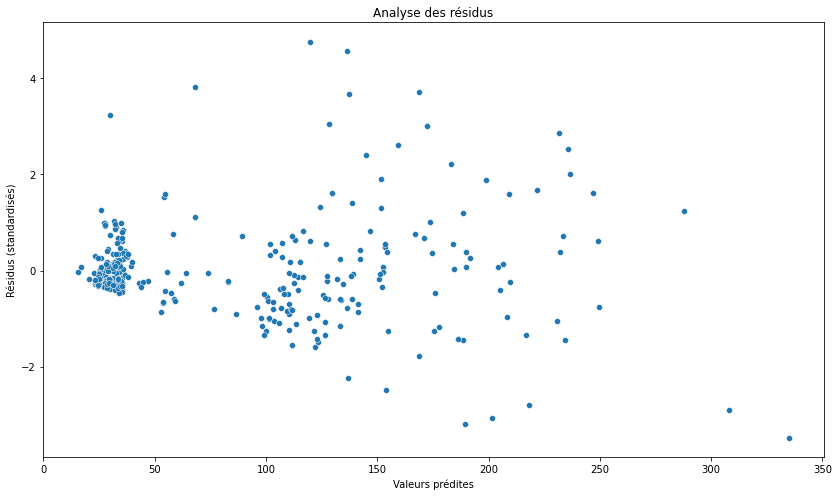

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.scatterplot(data=y_pred, x="Label", y="scaled_residuals")
plt.title("Analyse des résidus") #title
plt.xlabel("Valeurs prédites") #x label
plt.ylabel("Résidus (standardisés)") #y label
plt.show()

#### Feature Importance

In [55]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
feature_importance =[]

for i in Total_GHG_Emissions.columns:
    if i not in feature_importance:
        Total_GHG_Emissions = Total_GHG_Emissions.drop(i, axis = 1)

In [17]:
exp_name = setup(data = Total_GHG_Emissions,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,2295
1,Target,TotalGHGEmissions
2,Original Data,"(1696, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1356, 5)"


In [18]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,32.1746,3194.8441,56.5230,0.5902,0.6780,0.8015
1,31.7617,2509.2680,50.0926,0.5775,0.6477,0.7346
2,38.3549,3978.6936,63.0769,0.5427,0.7892,1.0494
3,23.9174,1568.3503,39.6024,0.7061,0.5673,0.5782
4,33.7046,3070.7778,55.4146,0.5888,0.7515,0.9486
5,30.9740,2300.5140,47.9637,0.6491,0.6803,0.8255
6,29.5742,2516.8358,50.1681,0.6484,0.6429,0.6509
7,32.8047,3343.8793,57.8263,0.5074,0.6272,0.6157
8,25.8390,1540.8933,39.2542,0.7416,0.6577,0.8455
9,27.4557,2125.3592,46.1016,0.6874,0.5722,0.6328


In [19]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,51.7916,5442.4670,73.7731,0.3020,0.9197,1.4968
1,47.4637,4243.8518,65.1449,0.2855,0.8514,1.2084
2,55.0171,5496.8909,74.1410,0.3683,0.9778,1.5894
3,39.5033,2980.6141,54.5950,0.4415,0.7513,0.9740
4,46.8454,4602.7462,67.8435,0.3837,0.8788,1.3026
5,44.9122,3600.7785,60.0065,0.4508,0.8119,1.1368
6,46.2751,4275.7215,65.3890,0.4028,0.7823,1.0138
7,50.0017,4893.3959,69.9528,0.2791,0.8249,1.1151
8,43.7794,3096.0326,55.6420,0.4809,0.8591,1.3261
9,46.4830,3883.2017,62.3153,0.4289,0.7776,1.0542


In [20]:
# generate predictions on unseen data
y_pred = predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,45.5467,4084.4582,63.9098,0.4041,0.8529,1.2526


### Avec passage au log de la variable à expliquer

In [51]:
#Total_GHG_Emissions = pd.read_csv('Dataset_TotalGHGEmissions.csv')
#Total_GHG_Emissions = Total_GHG_Emissions.drop('Unnamed: 0', axis=1)

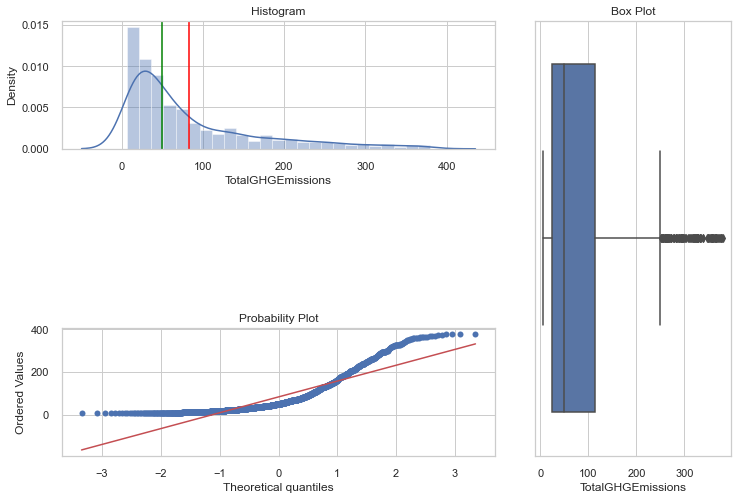

In [56]:
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[2, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)
 
    ax3 = fig.add_subplot(grid[:, 2]) 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )

three_chart_plot(Total_GHG_Emissions, 'TotalGHGEmissions')

In [57]:
from scipy.stats import skew
print("Skewness of TotalGHGEmissions is", Total_GHG_Emissions['TotalGHGEmissions'].skew())

Skewness of TotalGHGEmissions is 1.5692929002432747


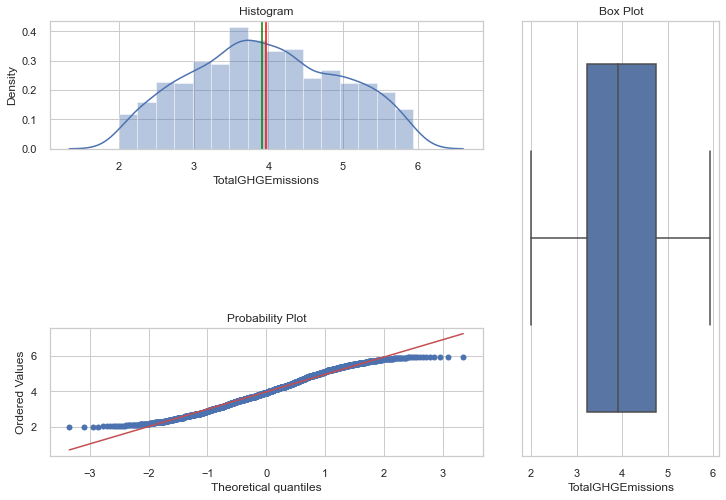

In [58]:
Total_GHG_Emissions["TotalGHGEmissions"] = np.log1p(Total_GHG_Emissions["TotalGHGEmissions"])
three_chart_plot(Total_GHG_Emissions, 'TotalGHGEmissions')

In [59]:
print("Skewness of TotalGHGEmissions is", Total_GHG_Emissions['TotalGHGEmissions'].skew())

Skewness of TotalGHGEmissions is 0.05692164562813998


In [60]:
from pycaret.regression import *
exp_name = setup(data = Total_GHG_Emissions,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,2167
1,Target,TotalGHGEmissions
2,Original Data,"(1696, 18)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1356, 55)"


In [61]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3251,0.2528,0.5005,0.7415,0.1067,0.0898,1.2540
rf,Random Forest Regressor,0.4114,0.3049,0.5511,0.6866,0.1174,0.1147,1.3070
lightgbm,Light Gradient Boosting Machine,0.4297,0.3258,0.5694,0.6655,0.1213,0.1190,0.6920
gbr,Gradient Boosting Regressor,0.5189,0.4308,0.6558,0.5583,0.1409,0.1462,0.4370
dt,Decision Tree Regressor,0.4462,0.5078,0.7112,0.4776,0.1500,0.1218,0.0810
ridge,Ridge Regression,0.5736,0.5242,0.7229,0.4644,0.1529,0.1598,0.0420
br,Bayesian Ridge,0.5762,0.5253,0.7237,0.4633,0.1531,0.1608,0.0480
lr,Linear Regression,0.5814,0.5405,0.7342,0.4466,0.1554,0.1623,2.8280
ada,AdaBoost Regressor,0.6559,0.6233,0.7888,0.3622,0.1660,0.1819,0.1910
omp,Orthogonal Matching Pursuit,0.6646,0.6884,0.8276,0.2994,0.1730,0.1860,0.0260


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2167, verbose=0, warm_start=False)

In [62]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3267,0.2562,0.5062,0.7801,0.1052,0.0885
1,0.3163,0.2362,0.4860,0.7252,0.1023,0.0850
2,0.3664,0.3270,0.5718,0.6757,0.1191,0.0985
3,0.3237,0.2700,0.5196,0.7397,0.1155,0.0945
4,0.3655,0.3337,0.5777,0.6454,0.1224,0.0987
5,0.2872,0.2021,0.4495,0.7968,0.0927,0.0771
6,0.2897,0.1939,0.4403,0.7988,0.1008,0.0869
7,0.2977,0.1905,0.4364,0.7881,0.0948,0.0839
8,0.3505,0.2573,0.5072,0.7406,0.1057,0.0946
9,0.3271,0.2608,0.5107,0.7244,0.1086,0.0900


In [63]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6871,0.6811,0.8253,0.4153,0.1732,0.1899
1,0.6236,0.6025,0.7762,0.2990,0.1597,0.1642
2,0.6395,0.6488,0.8055,0.3565,0.1656,0.1713
3,0.5993,0.5931,0.7701,0.4282,0.1690,0.1799
4,0.6409,0.6210,0.7880,0.3402,0.1621,0.1713
5,0.5991,0.5797,0.7614,0.4169,0.1612,0.1684
6,0.5870,0.5335,0.7304,0.4465,0.1608,0.1726
7,0.5699,0.4632,0.6806,0.4847,0.1473,0.1630
8,0.5864,0.5185,0.7201,0.4772,0.1522,0.1648
9,0.6029,0.5572,0.7465,0.4111,0.1584,0.1708


In [64]:
# generate predictions on unseen data
y_pred = predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5725,0.5008,0.7076,0.4319,0.1515,0.1609


#### Analyse des résidus

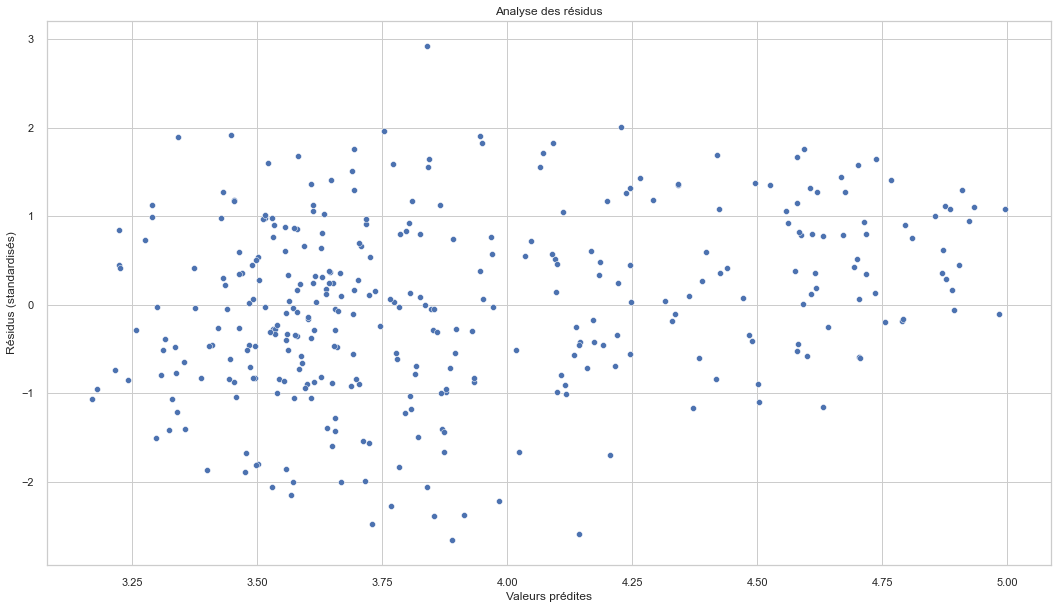

In [65]:
y_pred['Residuals'] = y_pred['TotalGHGEmissions'] - y_pred['Label']


from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of residuals
y_pred['scaled_residuals'] = scale.fit_transform(y_pred['Residuals'].values.reshape(-1,1)) 



import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
sns.scatterplot(data=y_pred, x="Label", y="scaled_residuals")
plt.title("Analyse des résidus") #title
plt.xlabel("Valeurs prédites") #x label
plt.ylabel("Résidus (standardisés)") #y label
plt.show()

#### Feature Importance

In [67]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [35]:
feature_importance =[]


for i in Total_GHG_Emissions.columns:
    if i not in feature_importance:
        Total_GHG_Emissions = Total_GHG_Emissions.drop(i, axis = 1)

In [36]:
exp_name = setup(data = Total_GHG_Emissions,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,6732
1,Target,TotalGHGEmissions
2,Original Data,"(1696, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1356, 5)"


In [37]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5119,0.4448,0.6670,0.5370,0.1430,0.1477
1,0.5259,0.4907,0.7005,0.5368,0.1460,0.1410
2,0.4791,0.3880,0.6229,0.6316,0.1313,0.1323
3,0.5128,0.4346,0.6592,0.5182,0.1402,0.1440
4,0.4860,0.3737,0.6113,0.5574,0.1276,0.1317
5,0.4907,0.4222,0.6498,0.5942,0.1389,0.1387
6,0.5216,0.4378,0.6616,0.4739,0.1348,0.1371
7,0.4743,0.3676,0.6063,0.6242,0.1326,0.1378
8,0.5107,0.4595,0.6779,0.5219,0.1443,0.1456
9,0.6295,0.6871,0.8289,0.3633,0.1742,0.1766


In [39]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,49.7556,4554.9756,67.4906,0.3013,0.8968,1.4202
1,46.7050,3922.5927,62.6306,0.2981,0.8090,1.1159
2,51.4221,5697.4535,75.4815,0.3397,0.8506,1.1624
3,49.1515,4203.6851,64.8358,0.2621,0.9111,1.4151
4,47.1671,3760.5723,61.3235,0.3767,0.8435,1.2203
5,48.3275,4087.8607,63.9364,0.4453,0.8708,1.2973
6,56.3604,6033.0867,77.6729,0.1394,0.9277,1.3688
7,50.9463,4860.9001,69.7202,0.3627,0.8317,1.1383
8,46.5935,4014.8324,63.3627,0.2745,0.9495,1.5206
9,50.6825,5163.2213,71.8556,0.3735,0.8462,1.1999


In [38]:
# generate predictions on unseen data
y_pred = predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.5101,0.4228,0.6502,0.5429,0.1398,0.1455


## TotalGHGEmissions (sans ENERGYSTARScore)

### Sans passage au log de la variable à expliquer

In [68]:
#Total_GHG_Emissions_Sans_ENERGYSTARScore = pd.read_csv('Dataset_TotalGHGEmissions.csv')
#Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop('Unnamed: 0', axis=1)
#Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop('ENERGYSTARScore', axis=1)

In [72]:
from pycaret.regression import *
exp_name = setup(data = Total_GHG_Emissions_Sans_ENERGYSTARScore,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,3483
1,Target,TotalGHGEmissions
2,Original Data,"(1696, 17)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1356, 55)"


In [73]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,25.6108,2278.0424,47.4290,0.6508,0.5198,0.4791,1.1380
rf,Random Forest Regressor,29.3139,2362.7122,48.2709,0.6384,0.5716,0.6168,1.4330
lightgbm,Light Gradient Boosting Machine,32.0299,2436.7569,49.0236,0.6286,0.6762,0.6971,0.6260
gbr,Gradient Boosting Regressor,36.5094,2867.9711,53.3156,0.5626,0.6954,0.8637,0.4380
dt,Decision Tree Regressor,30.6836,3693.4398,60.2154,0.4343,0.6469,0.5751,0.0590
br,Bayesian Ridge,43.0509,3823.8589,61.5721,0.4167,0.7941,1.0131,0.0520
ridge,Ridge Regression,42.9137,3824.9189,61.5593,0.4164,0.8049,1.0019,0.0540
lr,Linear Regression,43.1003,3847.6535,61.7530,0.4125,0.8157,1.0197,2.4950
lasso,Lasso Regression,45.6983,4146.6197,64.1639,0.3678,0.8120,1.1330,0.0460
omp,Orthogonal Matching Pursuit,45.0087,4290.3420,65.2759,0.3414,0.8096,1.0965,0.0300


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=3483, verbose=0, warm_start=False)

In [74]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,25.2665,2593.1470,50.9230,0.6201,0.5480,0.4379
1,24.8804,2627.3771,51.2579,0.5485,0.6050,0.6345
2,25.5161,2375.4390,48.7385,0.6780,0.4752,0.4154
3,25.1989,2245.4319,47.3860,0.5474,0.5325,0.5556
4,30.0846,2971.5941,54.5123,0.5817,0.5373,0.4039
5,20.8704,1855.3707,43.0740,0.7117,0.4932,0.3935
6,28.6669,2363.6589,48.6175,0.6463,0.5933,0.6347
7,27.5463,2442.0087,49.4167,0.7072,0.5390,0.5119
8,21.2109,1154.0107,33.9707,0.8014,0.4092,0.3871
9,26.8674,2152.3860,46.3938,0.6654,0.4656,0.4169


In [75]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,34.1216,2881.0070,53.6750,0.5780,0.6851,0.8494
1,35.7698,3255.7261,57.0590,0.4405,0.7487,1.0013
2,40.4241,3694.7421,60.7844,0.4992,0.7150,0.9202
3,36.9462,2765.8503,52.5914,0.4425,0.7207,0.9447
4,42.4824,3723.5585,61.0210,0.4758,0.6926,0.7538
5,34.9343,2751.7728,52.4573,0.5724,0.7004,0.8680
6,38.8173,2953.3973,54.3452,0.5580,0.7546,1.0353
7,39.4449,3499.9356,59.1603,0.5804,0.6993,0.8711
8,33.6736,1978.6399,44.4819,0.6594,0.6730,0.8698
9,40.0562,3236.1169,56.8869,0.4969,0.6467,0.7359


In [76]:
# generate predictions on unseen data
y_pred = predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,35.0102,2853.0591,53.4140,0.6317,0.6598,0.8137


#### Analyse des résidus

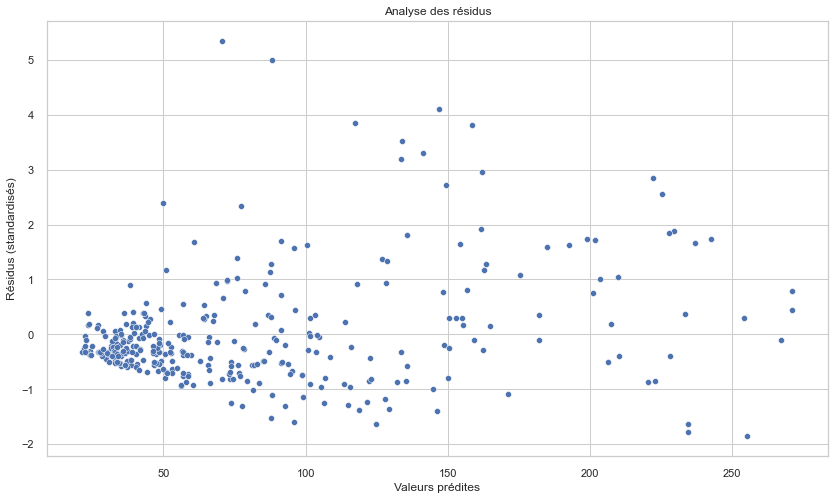

In [77]:
y_pred['Residuals'] = y_pred['TotalGHGEmissions'] - y_pred['Label']


from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of residuals
y_pred['scaled_residuals'] = scale.fit_transform(y_pred['Residuals'].values.reshape(-1,1)) 



import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.scatterplot(data=y_pred, x="Label", y="scaled_residuals")
plt.title("Analyse des résidus") #title
plt.xlabel("Valeurs prédites") #x label
plt.ylabel("Résidus (standardisés)") #y label
plt.show()

#### Feature Importance

In [78]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [51]:
feature_importance =[]


for i in Total_GHG_Emissions_Sans_ENERGYSTARScore.columns:
    if i not in feature_importance:
        Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop(i, axis = 1)


In [52]:
exp_name = setup(data = Total_GHG_Emissions_Sans_ENERGYSTARScore,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,7920
1,Target,TotalGHGEmissions
2,Original Data,"(1696, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1356, 4)"


In [53]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20.9336,2113.4999,45.9728,0.6184,0.6485,0.6582
1,29.5042,3455.2951,58.7818,0.4512,0.7436,0.8867
2,31.3438,3345.7829,57.8427,0.5094,0.6626,0.6167
3,31.5221,3377.4986,58.1163,0.3441,0.6874,0.8085
4,28.8612,2833.1939,53.2278,0.5841,0.7280,0.8688
5,32.7120,3907.1598,62.5073,0.4210,0.6666,0.6957
6,31.9797,3673.8024,60.6119,0.4944,0.7057,0.7598
7,38.1544,5240.0158,72.3880,0.3161,0.7256,0.8282
8,35.6723,4646.1999,68.1630,0.2510,0.7521,0.7868
9,37.2205,3971.1753,63.0173,0.4878,0.6808,0.7470


In [54]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44.6523,3959.2141,62.9223,0.2851,0.8965,1.3191
1,44.6873,3954.0220,62.8810,0.3720,0.9353,1.5602
2,48.5213,4769.5463,69.0619,0.3006,0.8611,1.2071
3,46.8429,3937.9711,62.7533,0.2352,0.8517,1.2023
4,49.3054,4270.2843,65.3474,0.3731,1.0098,1.7063
5,53.3458,5736.5747,75.7402,0.1499,0.8713,1.1888
6,48.9455,4822.7897,69.4463,0.3363,0.8394,1.1631
7,57.5647,6075.3928,77.9448,0.2071,0.9486,1.4808
8,50.5647,5041.0715,71.0005,0.1874,0.9365,1.4473
9,58.0964,6091.3352,78.0470,0.2144,0.9290,1.3599


In [55]:
# generate predictions on unseen data
y_pred = predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,50.8128,5091.2473,71.3530,0.3217,0.8509,1.1618


### Avec passage au log de la variable à expliquer

In [81]:
#Total_GHG_Emissions_Sans_ENERGYSTARScore = pd.read_csv('Dataset_TotalGHGEmissions.csv')
#Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop('Unnamed: 0', axis=1)
#Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop('ENERGYSTARScore', axis=1)

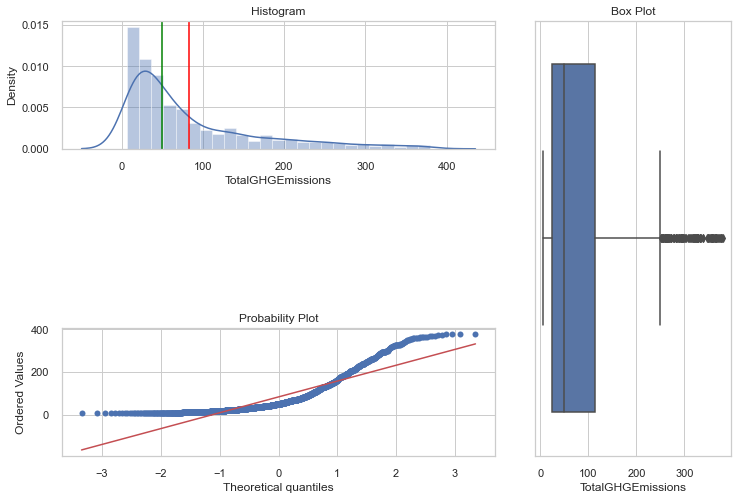

In [79]:
three_chart_plot(Total_GHG_Emissions_Sans_ENERGYSTARScore, 'TotalGHGEmissions')

In [80]:
from scipy.stats import skew
print("Skewness of TotalGHGEmissions is", Total_GHG_Emissions_Sans_ENERGYSTARScore['TotalGHGEmissions'].skew())

Skewness of TotalGHGEmissions is 1.5692929002432747


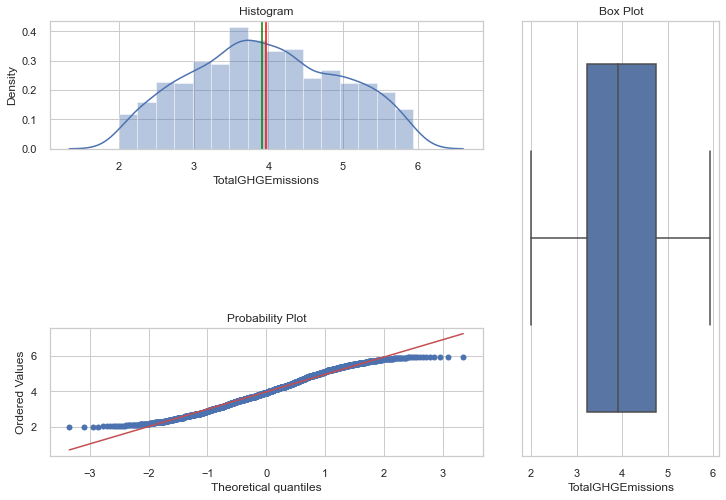

In [81]:
Total_GHG_Emissions_Sans_ENERGYSTARScore["TotalGHGEmissions"] = np.log1p(Total_GHG_Emissions_Sans_ENERGYSTARScore["TotalGHGEmissions"])
three_chart_plot(Total_GHG_Emissions_Sans_ENERGYSTARScore, 'TotalGHGEmissions')

In [82]:
print("Skewness of TotalGHGEmissions is", Total_GHG_Emissions_Sans_ENERGYSTARScore['TotalGHGEmissions'].skew())

Skewness of TotalGHGEmissions is 0.05692164562813998


In [83]:
from pycaret.regression import *
exp_name = setup(data = Total_GHG_Emissions_Sans_ENERGYSTARScore,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,7632
1,Target,TotalGHGEmissions
2,Original Data,"(1696, 17)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1356, 53)"


In [84]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3740,0.3462,0.5861,0.6320,0.1242,0.1038,1.2730
rf,Random Forest Regressor,0.4222,0.3511,0.5911,0.6245,0.1255,0.1177,1.1700
lightgbm,Light Gradient Boosting Machine,0.4469,0.3751,0.6110,0.5989,0.1305,0.1247,0.6240
gbr,Gradient Boosting Regressor,0.5361,0.4812,0.6927,0.4849,0.1482,0.1514,0.4440
dt,Decision Tree Regressor,0.4460,0.5460,0.7335,0.4149,0.1555,0.1214,0.0980
ridge,Ridge Regression,0.5808,0.5501,0.7403,0.4110,0.1567,0.1627,0.0520
br,Bayesian Ridge,0.5837,0.5510,0.7410,0.4099,0.1570,0.1637,0.0420
lr,Linear Regression,0.5816,0.5536,0.7425,0.4077,0.1571,0.1628,2.8600
ada,AdaBoost Regressor,0.6505,0.6354,0.7968,0.3195,0.1673,0.1802,0.1530
omp,Orthogonal Matching Pursuit,0.6403,0.6496,0.8051,0.3046,0.1696,0.1799,0.0200


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7632, verbose=0, warm_start=False)

In [85]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3660,0.3003,0.5480,0.6887,0.1206,0.1060
1,0.3824,0.3224,0.5678,0.6550,0.1230,0.1094
2,0.3776,0.3141,0.5605,0.6398,0.1160,0.1022
3,0.4162,0.4706,0.6860,0.5407,0.1464,0.1163
4,0.3501,0.2894,0.5380,0.6319,0.1067,0.0877
5,0.3975,0.3745,0.6120,0.6382,0.1305,0.1132
6,0.3392,0.3343,0.5782,0.6627,0.1186,0.0912
7,0.4439,0.4148,0.6441,0.5376,0.1395,0.1284
8,0.3824,0.3908,0.6251,0.6273,0.1342,0.1055
9,0.2850,0.2511,0.5011,0.6986,0.1067,0.0779


In [86]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6199,0.5807,0.7620,0.3981,0.1652,0.1768
1,0.5715,0.4982,0.7058,0.4669,0.1538,0.1670
2,0.5669,0.5245,0.7242,0.3986,0.1548,0.1599
3,0.6058,0.6104,0.7813,0.4042,0.1660,0.1692
4,0.5808,0.5298,0.7279,0.3261,0.1435,0.1449
5,0.6358,0.5824,0.7632,0.4374,0.1622,0.1804
6,0.6155,0.5913,0.7690,0.4034,0.1677,0.1843
7,0.6413,0.6417,0.8010,0.2848,0.1726,0.1825
8,0.6125,0.5837,0.7640,0.4432,0.1652,0.1779
9,0.5655,0.5008,0.7077,0.3989,0.1507,0.1575


In [87]:
# generate predictions on unseen data
y_pred = predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6336,0.6146,0.7840,0.4105,0.1663,0.1777


#### Analyse des résidus

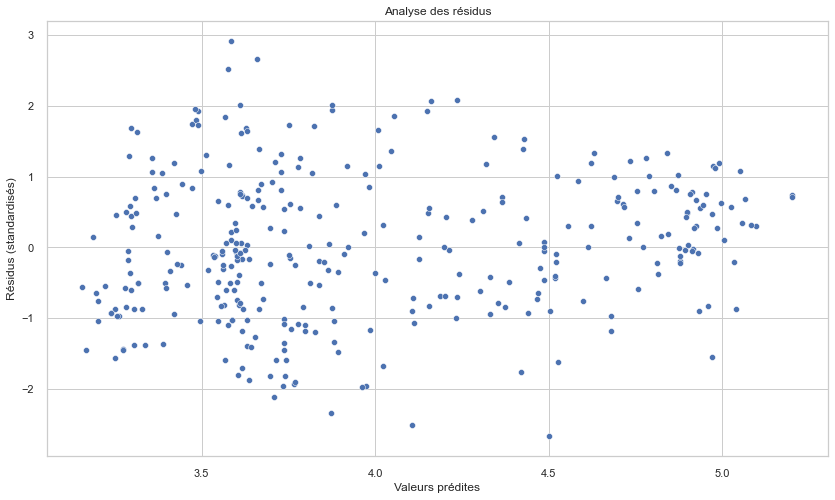

In [88]:
y_pred['Residuals'] = y_pred['TotalGHGEmissions'] - y_pred['Label']


from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of residuals
y_pred['scaled_residuals'] = scale.fit_transform(y_pred['Residuals'].values.reshape(-1,1)) 



import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.scatterplot(data=y_pred, x="Label", y="scaled_residuals")
plt.title("Analyse des résidus") #title
plt.xlabel("Valeurs prédites") #x label
plt.ylabel("Résidus (standardisés)") #y label
plt.show()

#### Feature Importance

In [89]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [72]:
feature_importance =['LowConsumer_1',
                     'PrimaryPropertyType_Small- and Mid-Sized Office',
                     'PrimaryPropertyType_Hotel',
                     'GasSource_0',
                     'NumberofFloors',
                     'LargestPropertyUseTypeGFA',
                     'GFAPerBuilding',
                     'PrimaryPropertyType_Large Office',
                     'GFAPerFloor',
                     'TotalUseTypeNumber_2',
                     'TotalGHGEmissions']


for i in Total_GHG_Emissions_Sans_ENERGYSTARScore.columns:
    if i not in feature_importance:
        Total_GHG_Emissions_Sans_ENERGYSTARScore = Total_GHG_Emissions_Sans_ENERGYSTARScore.drop(i, axis = 1)

In [73]:
exp_name = setup(data = Total_GHG_Emissions_Sans_ENERGYSTARScore,  target = 'TotalGHGEmissions', train_size = 0.8)

,Description,Value
0,session_id,3881
1,Target,TotalGHGEmissions
2,Original Data,"(1696, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1356, 4)"


In [74]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3676,0.3449,0.5873,0.6351,0.1162,0.0944
1,0.4358,0.4958,0.7041,0.4546,0.1421,0.1142
2,0.4060,0.4164,0.6453,0.5355,0.1328,0.1063
3,0.2958,0.2639,0.5137,0.6525,0.1089,0.0805
4,0.3483,0.3097,0.5565,0.7086,0.1150,0.0945
5,0.3213,0.2874,0.5361,0.6574,0.1153,0.0893
6,0.3562,0.3471,0.5891,0.6746,0.1269,0.1053
7,0.3717,0.4202,0.6483,0.5995,0.1342,0.1043
8,0.3572,0.3567,0.5972,0.7050,0.1243,0.0970
9,0.4099,0.4578,0.6766,0.5556,0.1416,0.1171


In [75]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6988,0.7431,0.8621,0.2138,0.1794,0.1934
1,0.6902,0.7495,0.8657,0.1756,0.1802,0.1921
2,0.7143,0.7675,0.8761,0.1439,0.1838,0.1983
3,0.6374,0.6306,0.7941,0.1697,0.1634,0.1705
4,0.7224,0.7702,0.8776,0.2753,0.1818,0.1978
5,0.6700,0.6386,0.7991,0.2387,0.1675,0.1834
6,0.7230,0.7870,0.8871,0.2622,0.1868,0.2053
7,0.7466,0.8273,0.9096,0.2115,0.1955,0.2179
8,0.8579,1.0087,1.0044,0.1657,0.2118,0.2466
9,0.6912,0.7570,0.8701,0.2652,0.1779,0.1862


In [76]:
# generate predictions on unseen data
y_pred = predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6816,0.7261,0.8521,0.1976,0.1814,0.1966


In [ ]:
je resume tout dans un tableau et ça fera moins de pages redondantes
je garde seulement les r2 en metrics ? rmsle  ou rse 2  mesures ok
grid search
avec et j'ai pas reussi à mettrr le grid comme 